# Unsupervised Learning

Most common unsupervised learning tasks:
- Dimensionality Reduction
- Clustering
- Anomaly Detection
- Density Estimation
- Association Rule Learning

## Clustering Algorithms

Clustering is the task of identifying similar instances and putting them together in a cluster. 

### K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7) # make the blobs: y contains the cluster IDs, but won't be used because that's what we want to predict

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance is assigned a label but this is the index of the cluster it belongs to 
<div class="alert alert-block alert-danger">
Not The True Class Label like in classification.<br> Remember it is unsupervised!
</div>

In [2]:
y_pred is kmeans.labels_

True

In [3]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [5]:
# Adding new instances to clusters
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

Hard Clustering is when you assign each instance to a cluster.<br>
Soft Clustering is when you give each instance a score per cluster on how well it fits into the cluster.

Kmeans works by first setting random centriods, calculating the mean squared distance between the instances and then readjusting the centriods.

However sometimes you can get unlucky with the initial random centriods which can lead to suboptimal results. Here are some Centroid initialization methods to fix this issue <br>
1. Use the init param if you have a general idea of where the centriods should be.
2. Use the n_init param to run training multiple times. (Default is 10 times)

<b>The Performance Metric for Clustering is: <i>inertia</i></b><br>
It is the sum of the squared distances between the instances and their closest centriods.

In [6]:
kmeans.inertia_

224.07433122515732

To Speed up training time or if you have a large dataset that doesn't fit in memory, you can use Mini-Batch K-means

In [7]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

### How to find the optimal number of clusters<br>
Do not use inertia for this problem because it will always get lower as K increases

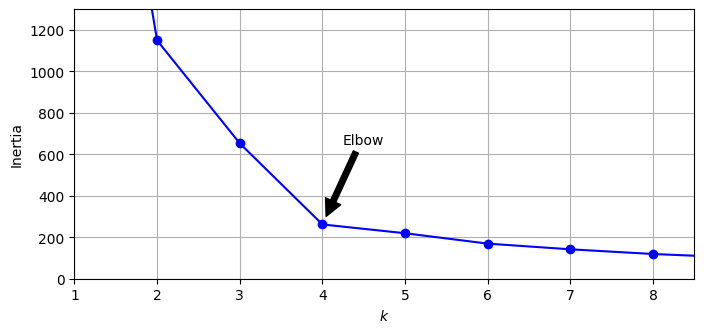

In [8]:
"""
Look for the elbow on a Inertia vs K graph
"""
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

A more precise but more computationally expensive approach is to use the <i><b>Silhouette score</b></i><br>
The Silhouette score goes from 1 to -1.<br> 1 means that it is in its own cluster and far from other centriods. <br>
0 means that it is close to a boundry line. <br> -1 means it is most likly in the wrong cluster. <br>
When using silhouette score you take the average score of all the instances and judge based on that

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6267891051050735

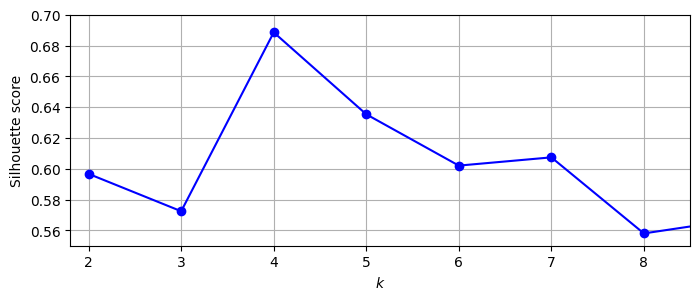

In [10]:
# extra code – this cell generates and saves Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

This graph along with the previous confirms that 4 clusters is probably the best option. It also shows that 5 may be a good option too.

## Limits of KMeans

K means struggles when the clusters are varying sizes, different densities, or nonspherical shapes.<br>
For these types of clusters Gaussian mixture models tend to work better.

## Using Clustering for Image Segmentation <br>
Image segmentation is the task of partitioning an image into multiple segments. The varients are
1. Color segmentation: pixels with similar color get assigned to the same segment. (ex. Analyzing satalite images to measure how much total forest area there is a region, color segmentation could work well)
2. Semantic segmentation: all pixels of the same object type get assigned to the same segment. (ex. In a self driving car system, all picels of a pedestrain's image might be assigned to the pedestrian segment(there would be one segment containing all the pedestrains.))
3. Instance segmentation: all pixels that are part of the same individual object are assigned to the same segment. (In this case there would be a different segment for each pedestrain.)

Semantic and Instance segmentation are done with Convolutional Neural Networks.

### Color Segmentation

In [11]:
import PIL
image = np.asarray(PIL.Image.open("/home/dude/Desktop/ML-Projects/ML-Book-Chapter-Notes/Data/ladybug.png"))
image.shape

(533, 800, 3)

In [12]:
# Reshape image to get list of colors
X = image.reshape(-1, 3)
# Use k-means to get 8 color clusters
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
# Create new image with the 8 clusters
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

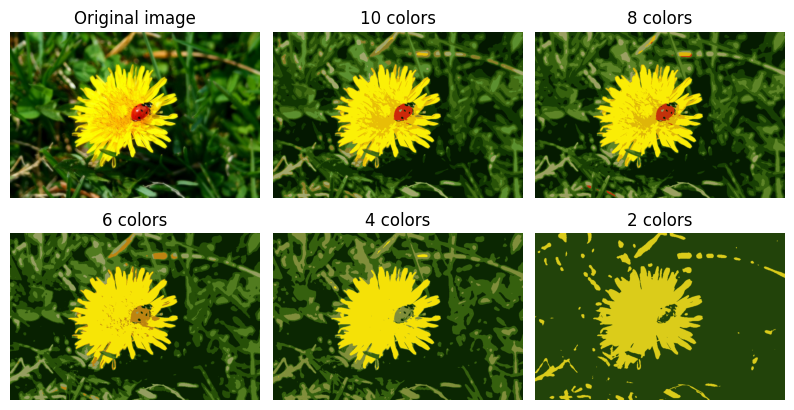

In [13]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

## Clustering for Semi-Supervised Learning<br>
Semi-Supervised learning is when you have many unlabeled instances but a few labeled ones

In [14]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [15]:
# Pretend we have 50 instances
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
print("Baseline score:")
log_reg.score(X_test, y_test)

Baseline score:


0.7581863979848866

In [16]:
# First cluster the training set into 50 clusters, 
# then for each cluster find the image closest to the centriod. 
# We will call these images the representative images

k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

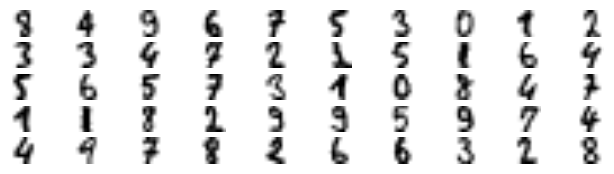

In [17]:
# extra code – this cell generates and saves Figure 9–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [18]:
# Next label the representative images
y_representative_digits = np.array([
    8,4,9,6,7,5,3,0,1,2,
    3,3,4,7,2,1,5,1,6,4,
    5,6,5,7,3,1,0,8,4,7,
    1,1,8,2,9,9,5,9,7,4,
    4,9,7,8,2,6,6,3,2,8
])

In [19]:
# Check if this improves performance
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

10% jump already.<br>
Now use label propagation. This is when you apply all the other instances in the same cluster the same label.

In [20]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8589420654911839

Another boost in performance, but now try to ignore the 1 percent of instances that are farthest from their cluster center: this should eleminate outliers

In [22]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [23]:
# Check performance after removing outliers
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

In [24]:
# Performance Refrence: whole labeled dataset
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

We got close to the same results using less labeled data.

Scikit-Learn has functions like LabelSpreading, LabelPropagation, and the SelfTrainingClassifier to help do this more effentially

<b>It is a good idea to do some active learning after using self-supervised learning to help improve the model even more</b>

## DBSCAN
<br> 
Density-Based Spatial Clustering of application with Noise(DBSCAN) is an algorithm that defines clusters as continuous regions of high density. Heres how it works:
<br> - For each instance the algorithm counts how many instances are located within a small distance $\epsilon$ (epsilon) from it. This region is called the instance's epsilon-neighborhood
<br> - If an instance has at least <i>min_samples</i> linstances in its e-neighborhood(including itself), then it is considered a core instance.
<br> - All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
<br> - Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [39]:
# Label of every instances
dbscan.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,

Instances with a cluster index of -1 are considered as anomalies by the algorithm

In [40]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [41]:
dbscan.components_

array([[-1.01401784,  0.15140074],
       [ 0.8621897 ,  0.32895938],
       [ 1.07389464, -0.5583518 ],
       ...,
       [ 0.8951456 , -0.4873567 ],
       [-0.99263241,  0.00152584],
       [-0.17320729,  0.90085132]])

DBSCAN in sklearn does not have a predict() method. In order to implement it into a classification task(That is using the clusters from the DBSCAN to do classification) you need to put it into another model.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [43]:
X_new = np.array([[-0.5,0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [44]:
knn.predict_proba(X_new)

array([[0.86, 0.14],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.  , 1.  ]])

This model is trained on the core instances only. This is a choice that depends on the final task.<br>
In short DBSCAN is a simple but powerful algorithm that is capable of indentifying any number of clusters of any shape. It is robust to outliers and only has two hyperparameters. However, if the density varies significantly across the clusters or there's no sufficiently low density region around some clusters, DBSCAN can struggle to capture all the clusters properly. It also doesn't scale well to large datasets

## Gaussian Mixtures